In [1]:
# 패키지설정
import statsmodels.api as sm
# mtcars 데이터 세트 읽기
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
print(mtcars)
# 엔진 마력과 연비 추출
data = mtcars[['hp', 'mpg']]
print(data)

                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                       
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  1

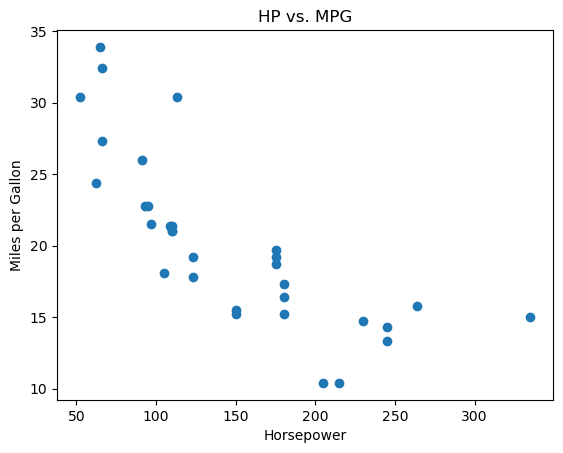

In [2]:
# 탐색적 데이터 분석 (엔진마력과 연비 분포)
import matplotlib.pyplot as plt
plt.scatter(data['hp'], data['mpg'])
plt.xlabel('Horsepower') # x축 라벨 추가
plt.ylabel('Miles per Gallon') # y축 라벨 추가
plt.title('HP vs. MPG') # 차트 제목 추가
plt.show()

[[-0.54365487  0.15329914]
 [-0.54365487  0.15329914]
 [-0.7955699   0.4567366 ]
 [-0.54365487  0.22072968]
 [ 0.41954967 -0.23442651]
 [-0.61774753 -0.33557233]
 [ 1.45684686 -0.97616253]
 [-1.25494437  0.72645879]
 [-0.76593284  0.4567366 ]
 [-0.35101396 -0.15013833]
 [-0.35101396 -0.38614524]
 [ 0.49364233 -0.62215216]
 [ 0.49364233 -0.47043343]
 [ 0.49364233 -0.8244438 ]
 [ 0.86410561 -1.63361037]
 [ 1.01229092 -1.63361037]
 [ 1.23456889 -0.90873199]
 [-1.19567025  2.07506974]
 [-1.40312969  1.737917  ]
 [-1.21048878  2.32793429]
 [-0.73629578  0.23758732]
 [ 0.04908639 -0.77387089]
 [ 0.04908639 -0.8244438 ]
 [ 1.45684686 -1.1447389 ]
 [ 0.41954967 -0.15013833]
 [-1.19567025  1.21533026]
 [-0.82520696  0.99618098]
 [-0.49919927  1.737917  ]
 [ 1.73839896 -0.72329798]
 [ 0.41954967 -0.06585014]
 [ 2.79051468 -0.85815908]
 [-0.5584734   0.22072968]]


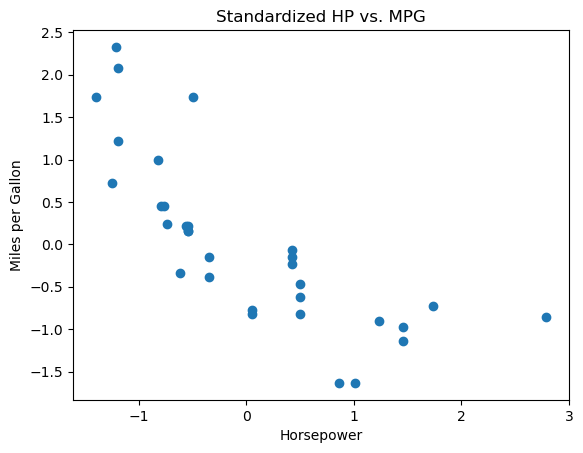

In [3]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)
print(data_std)

# 출력
plt.scatter(data_std[:,0], data_std[:,1])
plt.xlabel('Horsepower') # x축 라벨 추가
plt.ylabel('Miles per Gallon') # y축 라벨 추가
plt.title('Standardized HP vs. MPG') # 차트 제목 추가
plt.show()

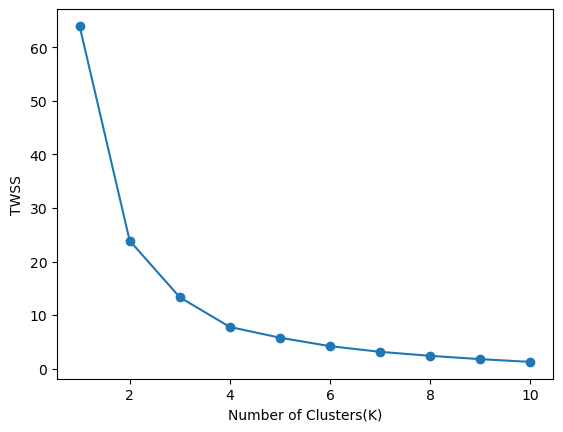

In [4]:
# 군집화
from sklearn.cluster import KMeans
# Elbow Method
# 클러스터 수별 TWSS 값
TWSS = {}
for k in range(1,11):
    # 군집 수 설정과 군집화 객체 생성
    model = KMeans(n_clusters=k, n_init=10)
    # 표준화된 X, Y데이터에 대한 군집화
    model.fit(data_std)
    TWSS[k] = model.inertia_
    
# 그래프 그리기
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

In [5]:
# 군집의 중심을 계산
# 군집화 개수를 K=4로 설정
K=4
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(data_std)
# 군집 중심
centers = kmeans.cluster_centers_
# 군집 라벨
labels = kmeans.labels_
print(centers)
print(labels)

[[ 1.50765326 -1.12547303]
 [-0.68510449  0.28509521]
 [ 0.27630387 -0.48354492]
 [-1.10083165  1.81883366]]
[1 1 1 1 2 1 0 1 1 1 2 2 2 2 0 0 0 3 3 3 1 2 2 0 2 3 1 3 0 2 0 1]


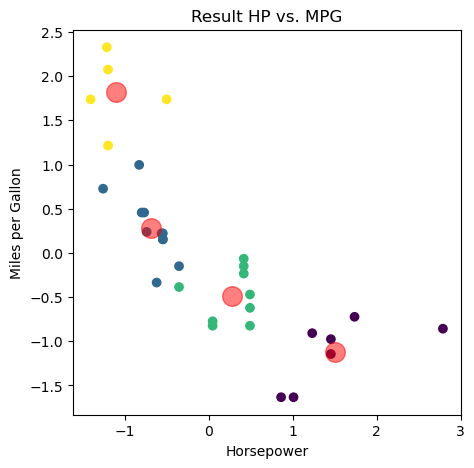

In [6]:
# 클러스터 출력
plt.figure(figsize=(5,5))
X = data_std[:,0]
Y = data_std[:,1]
plt.scatter(X,Y,c=labels)
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.title('Result HP vs. MPG') # 차트 제목 추가

# 군집의 중심을 표시
X = centers[:, 0]
Y = centers[:, 1]
plt.scatter(X,Y,c='red', s=200, alpha=0.5)
plt.show()